# Compte rendu de SAE-22 TP1


In [151]:
### Imports of modules and libs
import matplotlib
import numpy as np
import matplotlib.pylab as plt
import random


In [152]:
F = 2
T = np.linspace(0,1,1001)
X1 = np.sin(F*np.pi*2*T)

1. Expliquer ce que font les lignes de code de ce programme. 
Dans le but de visualiser graphiquement ce signal, nous utiliserons la bibliothèque Matplotlib 

Dans le programme ci-dessus, nous avons importé la bibliothèque Matplotlib.  
Puis, nous avons défini F comme étant égale à 2, T comme étant égale
à une liste allant de 0 à 1 d'une taille de 1001 et avec le même espacement entre chaques valeurs.  
Ensuite, nous avons défini X1, une liste des sinus de chaque valeur de T multiplié par 2\*$\pi$\*F.

Notre signal est donc caractérisé d'une fréquence de 2Hz et d'une amplitude 1 V.

2. Représenter graphiquement ce signal et vérifier qu’il est conforme aux attentes. 

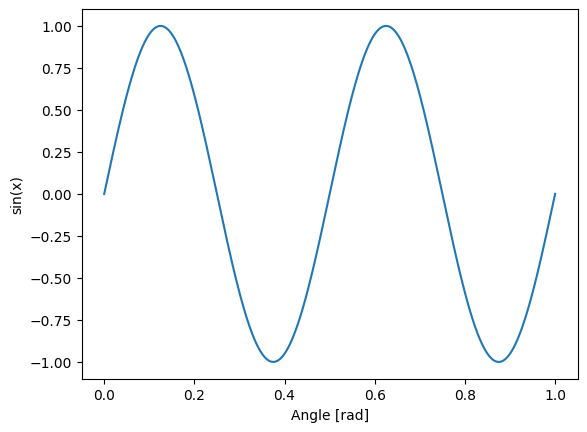

Super ! Notre signal est bien conforme aux attentes !


In [153]:

### Composition du code en dessous: (Par ligne)
### 1. On crée une figure PyPlot avec une échelle X de T et une échelle Y de X1 (au niveau des valeurs)
### 2. On met à jour le label pour l'échelle X
### 3. On met à jour le label pour l'échelle Y
### 4. On définit les axes comme étant serrés (On affichera pas plus de valeurs sur les échelles que les valeurs présentes
###   dans nos données)
### 5. On affiche finalement le PyPlot
plt.plot(T, X1)
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

#### ///////////////////////////////////////////////////
###
### Print after the show (statically, not dynamically)
### Too tired to even try to deduce if the output resembles
### of a sinus.
###
### ///////////////////////////////////////////////////
print("Super ! Notre signal est bien conforme aux attentes !")

3. Générer un second signal X2 de fréquence 5 Hz et d’amplitude 2 et représentez les deux signaux X1 
et X2 sur une même figure avec des couleurs différentes. 

In [154]:
#### On génère les nouvelles variables dans un bloc séparé, nous permettant de les utiliser autre part
### sans avoir à faire générer le Pyplot
F2 = 5
X2 = 2*np.sin(F2*np.pi*2*T) ### On ajoute 2 devant `np.sin` pour définir notre amplitude

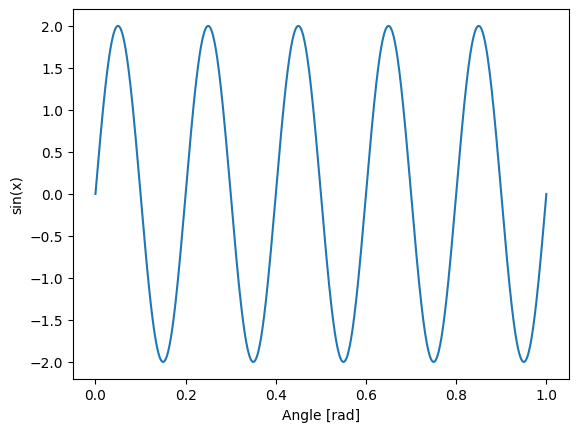

In [155]:
### Optionnel: Afficher le signal X2

plt.plot(T, X2)
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

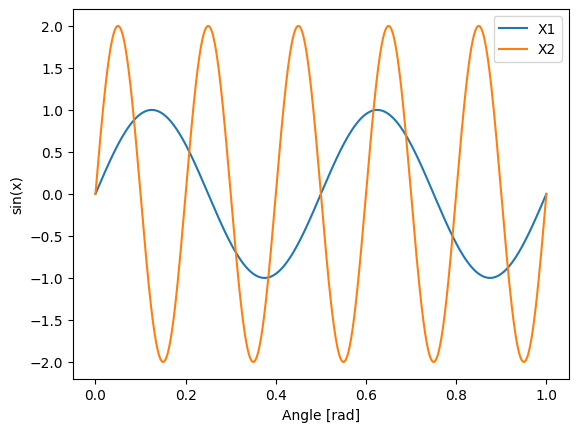

In [156]:
### On affiche le PyPlot des deux signaux: X1, X2

plt.plot(T, X1, label="X1")
plt.plot(T, X2, label="X2")
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.legend()
plt.show()

4. Produire un signal X3 représentant la somme des signaux X1 et X2 et afficher son allure. 

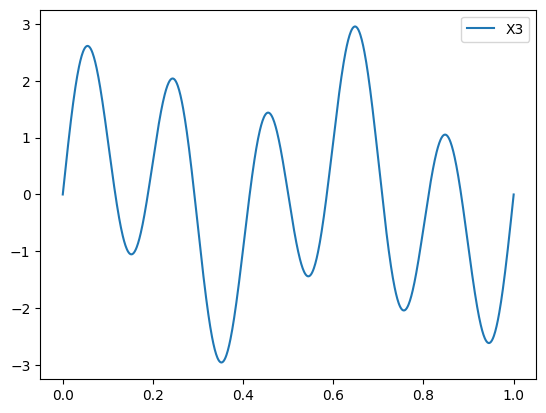

In [157]:
### On concatène la liste X1 et X2 afin de former
### X3 qui devient alors une liste de sommes de X1 et X2
X3 = X1 + X2

plt.plot(T, X3, label="X3")
plt.legend()
plt.show()

5. afficher simultanément les trois signaux X1, X2 et X3 et vérifier sur quelques points de ces courbes 
que les amplitudes des signaux sont conformes aux attentes. 

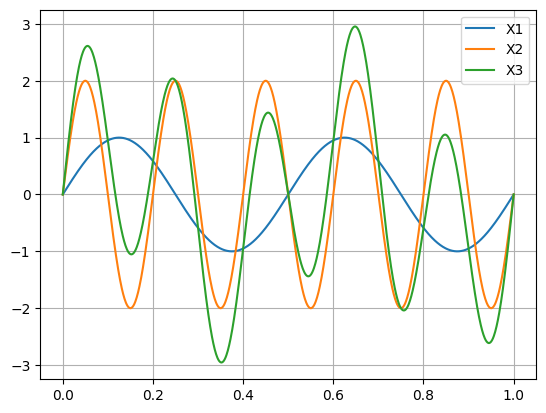

Ca correspond à nos attentes pour 0.38 !
Ca correspond à nos attentes pour 0.785 !
Ca correspond à nos attentes pour 0.999 !
Ca correspond à nos attentes pour 0.314 !
Ca correspond à nos attentes pour 0.0 !


In [158]:
### On affiche nos signaux
### On ajoute au PyPlot une grille afin de bien démarquer les valeurs
plt.grid(True)
plt.plot(T, X1, label="X1")
plt.plot(T, X2, label="X2")
plt.plot(T, X3, label="X3")
plt.legend()
plt.show()

### On crée une liste d'éléments de vérification
### Elle est totalement arbitraire et a été construite
### en demandant à mes collègues des valeurs.
### A noter: Les flottants, sur Python, se voient retirer
###   le dernier zéro si aucune valeur non nulle le succède.
###   Ce qui nous donne une liste, dans le runtime Python, équivalente à: [0.38, 0.785, 0.999, 0.314, 0.0]
liste_verif = [0.380, 0.785, 0.999, 0.314, 0.000]

### On parcoure notre liste
for elem in liste_verif:
  ### On a besoin de "calculer" l'indice de l'élement
  ### sur lequel on veut vérifier que la concaténation s'est bien passée.
  ### Vu que l'on utilise des types non-natifs à Python (i.e. une bonne vieille liste)
  ### mais natifs à NumpPy (i.e. NDArray), on utilise une combinaison
  ### de `where` et `isclose` pour trouver l'élément le plus proche de ce que l'on recherche
  ### (isclose est utilisée parce que l'on traite avec des flottants)
  ### puis retourner son indice dans le tableau
  verif_elem_index = np.where(np.isclose(liste_verif, elem))
  ### Condition simple où X1[i] + X2[i] == X3[i]
  ### Est-ce que l'addition `hard codée` de X1[i] et X2[i]
  ### est égale à la valeur X3[i] trouvée par concaténation ?
  if X1[verif_elem_index] + X2[verif_elem_index] == X3[verif_elem_index]:
    ### On trouve qu'apparemment oui, c'est une bonne chose !
    print(f"Ca correspond à nos attentes pour {elem} !")
  else:
    ### On trouve qu'apparemment non, ce n'est pas une bonne chose !
    print(f"Ca ne correspond pas à nos attentes pour {elem} !")


6. Les signaux réels sont souvent bruités. Reprendre le signal X1 et ajouter différents niveaux de bruit 
puis observer le signal obtenu. Utiliser pour cela la bibliothèque random. 

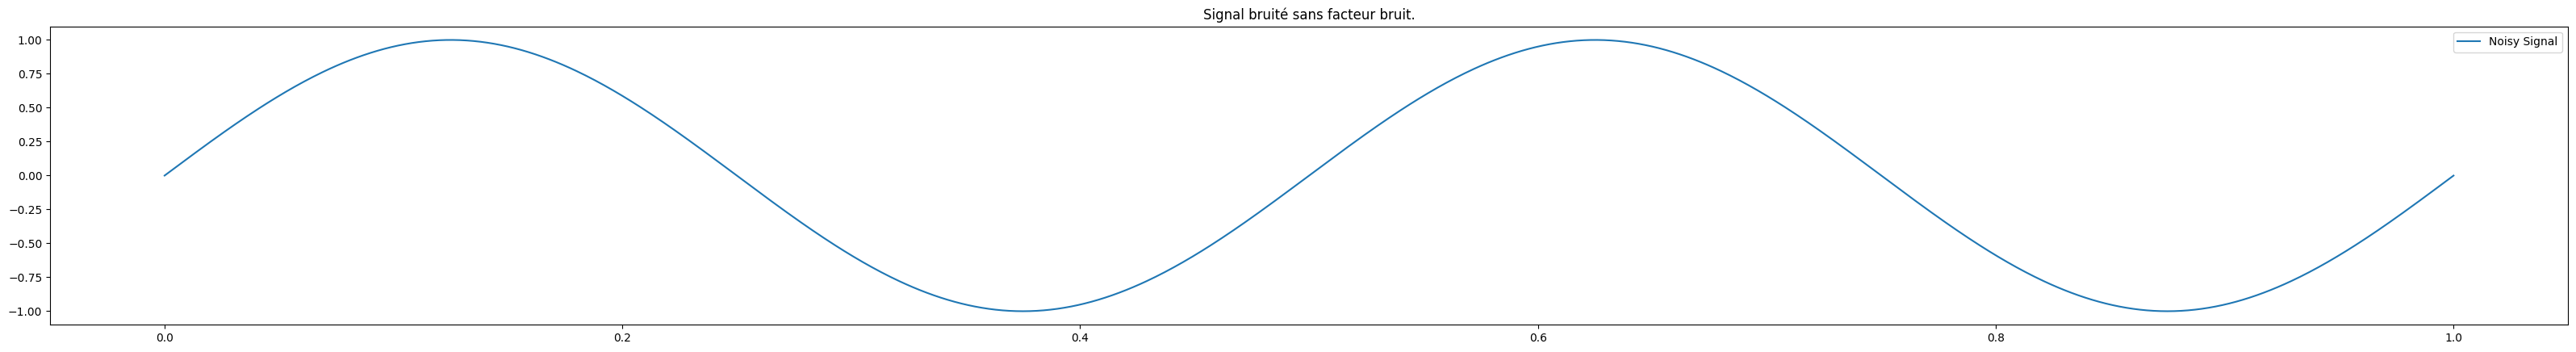

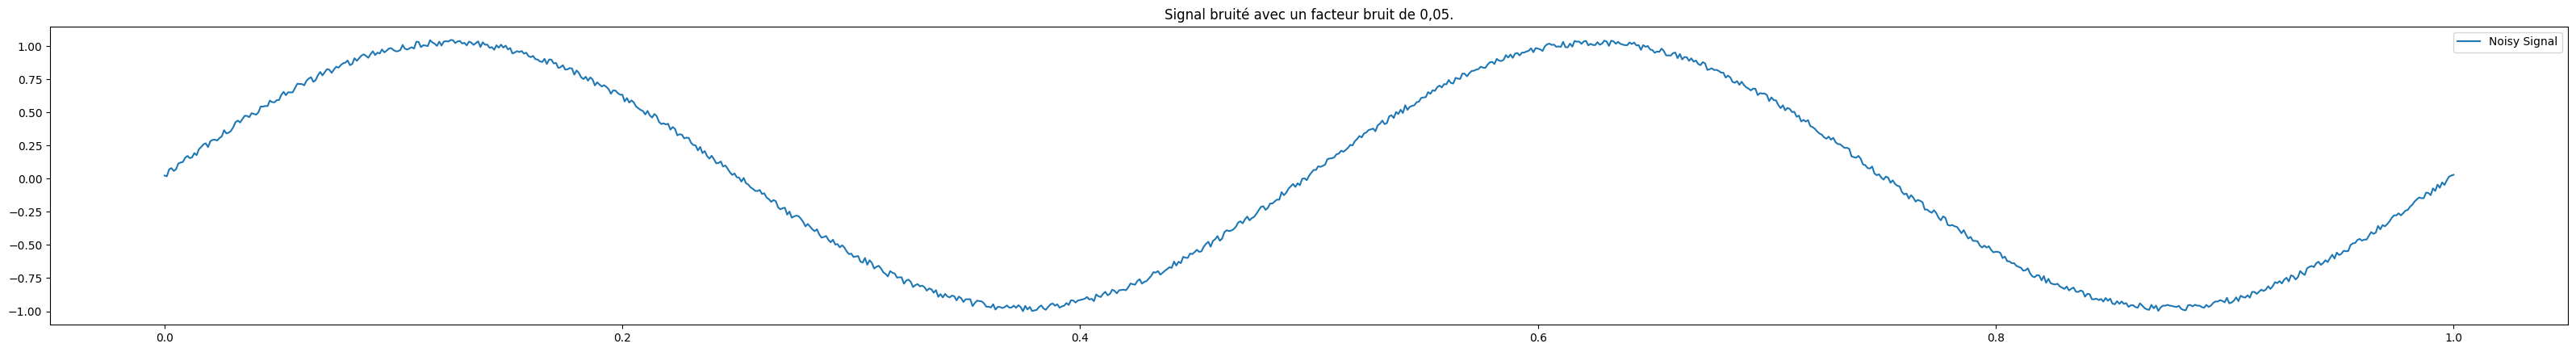

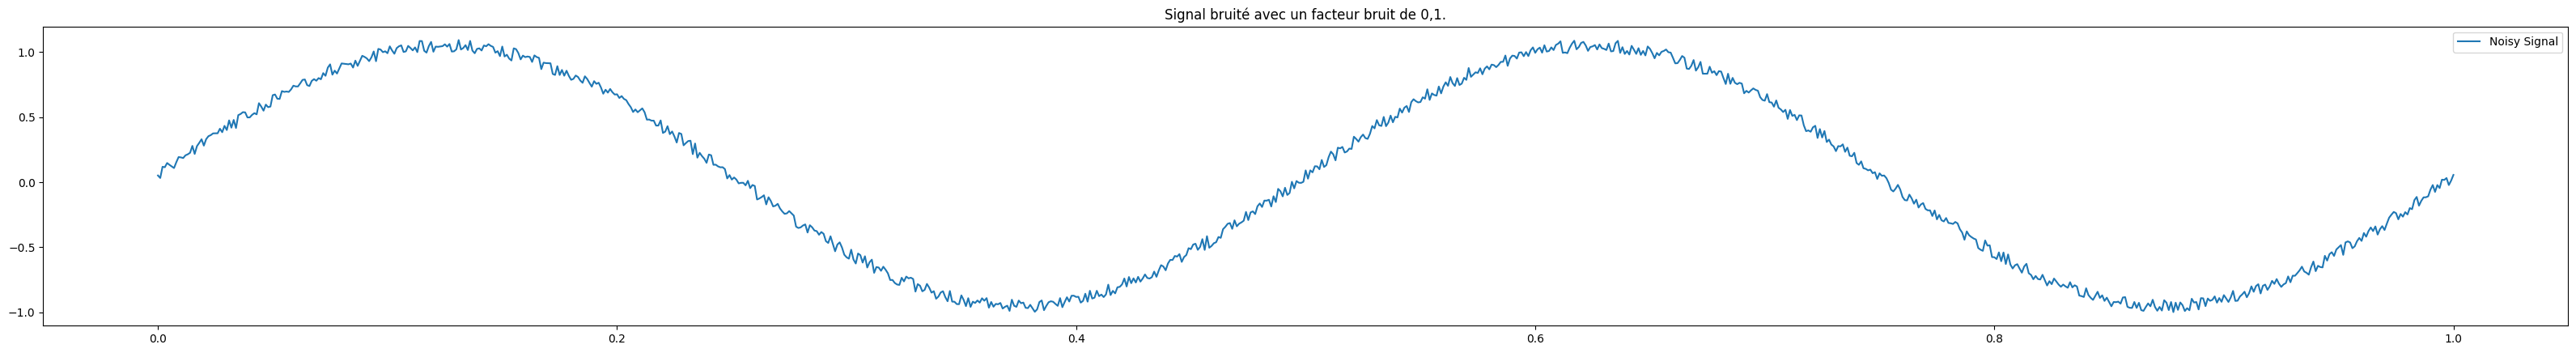

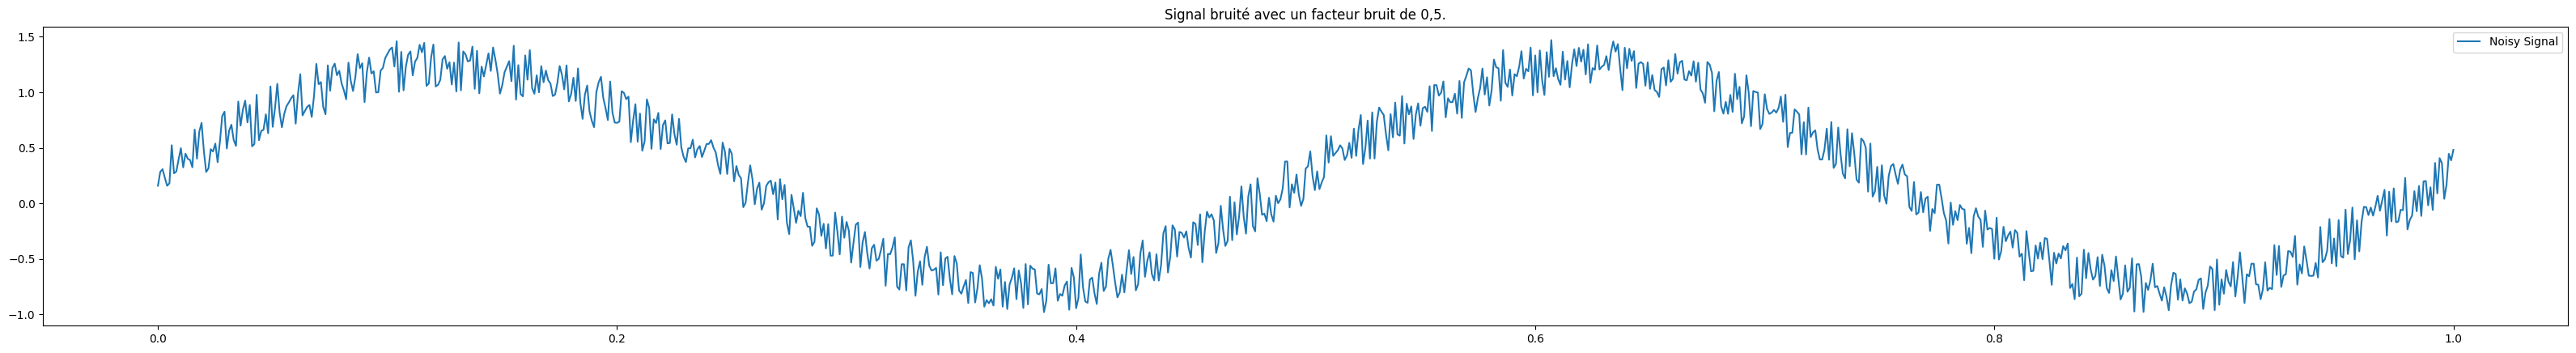

In [170]:
def introduceNoiseIntoSignal(signal, additional_noise_factor=0):
  ### On crée `noisy_signal` qui est une reconstruction du tableau
  ### de valeurs de `signal` où on y introduit un bruit aléatoire
  ### se situant entre 0 et 1 (principe de fonctionnement de `random.random`), on l'appellera la graine (variable `seed`).
  ### On permet aussi d'ajouter un facteur additionnel de bruit à notre graine afin d'amplifier le bruit simulé
  ### du canal de transmission.
  ###
  ### A noter: Vu que l'on a une graine qui est aléatoire chaque run effectuée de la fonction
  ### ne donnera pas le même résultat même si le facteur bruit ne change pas.
  noisy_signal = np.array([value + random.random()*additional_noise_factor for value in signal])

  return noisy_signal, additional_noise_factor

def showNoisySignal(signal_data):
  signal_values, additional_noise_factor = signal_data

  ### On reste avec `T` puisque l'on sait que l'on ne change pas notre
  ### échelle du temps.
  plt.plot(T, signal_values, label="Noisy Signal")
  plt.legend()
  plt.gcf().subplots_adjust(right=5) ### On ajuste la taille du PyPlot afin de mieux discerner la différence
  plt.title(f"Signal bruité {'avec un facteur bruit de ' + str(additional_noise_factor).replace('.', ',') if additional_noise_factor > 0 else 'sans facteur bruit'}.")
  plt.show()

showNoisySignal(introduceNoiseIntoSignal(X1))
showNoisySignal(introduceNoiseIntoSignal(X1, 0.05))
showNoisySignal(introduceNoiseIntoSignal(X1, 0.1))
showNoisySignal(introduceNoiseIntoSignal(X1, 0.5))

X1bruit = introduceNoiseIntoSignal(X1, 0.1)[0]

7. Tester d’autres types de signaux en utilisant la librairie mathématique (cos, abs, etc.). 

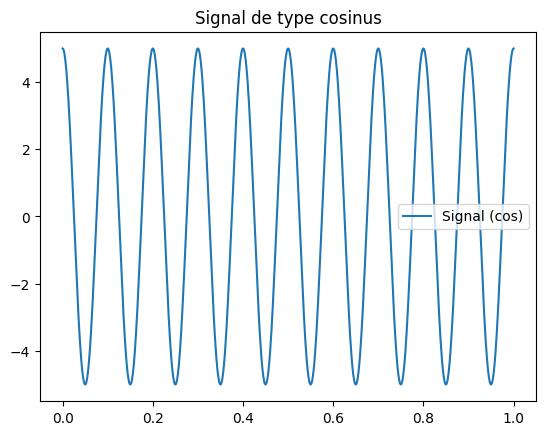

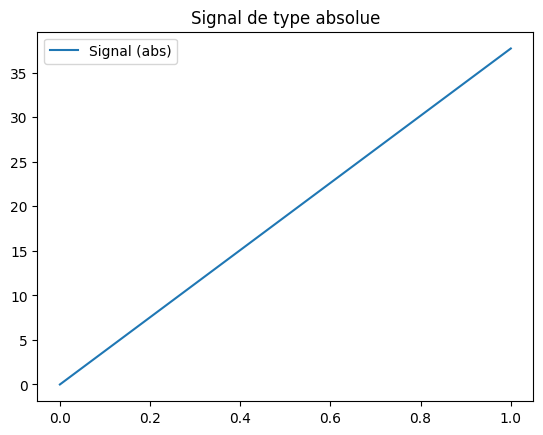

In [160]:
def showSimpleSignal(signal, kind, mini_kind):
    plt.plot(T, signal, label=f"Signal ({mini_kind})")
    plt.legend()
    plt.title(f"Signal de type {kind}")
    plt.show()

    return signal

### Signal sinusoïdal, créé à partir du cosinus
### Amplitude de 5, Fréquence de 2F (4Hz) et une forme 5*Pi*2F
Y1 = showSimpleSignal(5*np.cos(2*F*np.pi*5*T), "cosinus", "cos")
### Signal absolu, créé à partir de la valeur absolue
### Amplitude de 3, Fréquence de F (2Hz) et une forme 2*Pi*F
showSimpleSignal(introduceNoiseIntoSignal(3*np.abs(F*np.pi*2*T))[0], "absolue", "abs")

## Quantification des signaux

Afin d’enregistrer des signaux de manière numérique, il est nécessaire qu’ils soient représentés par un 
nombre fini de données binaires. Un convertisseur analogique numérique possède une résolution de 
conversion finie. La figure ci-dessous illustre la caractéristique de quantification d’un convertisseur à 3 
bits.

8. Réutiliser le signal X1 (d’amplitude 1 et de fréquence 2 Hz) et obtenir un signal quantifié X1q en 
utilisant le code suivant : 

```py
q=0.5 # pas de quantification 
X1q = q*np.round(X1/q) # signal quantifié 
```

Représenter graphiquement les signaux X1 et X1q sur la même figure. Commenter.

In [161]:
q = 0.5
X1q = q*np.round(X1/q)

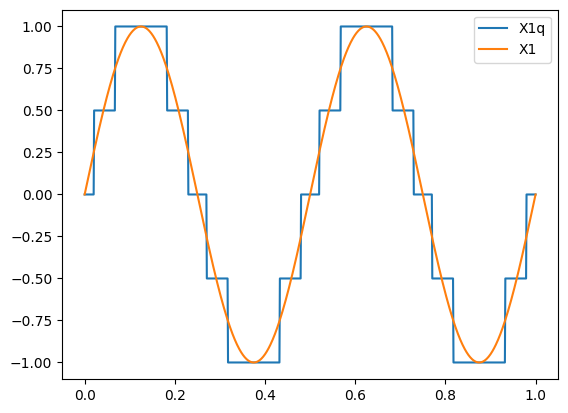

On peut voir qu'en effet, le signal X1q est le signal quantifié, on peut clairement appercevoir la quantification de 3 bits.


In [162]:
plt.plot(T, X1q, label="X1q")
plt.plot(T, X1, label="X1")
plt.legend()
plt.show()

print("On peut voir qu'en effet, le signal X1q est le signal quantifié, on peut clairement appercevoir la quantification de 3 bits.")

9. La quantification d’un signal s’accompagne nécessairement d’une perte d’information.  
En effet, le signal quantifié est différent du signal d’origine. Représenter la différence entre le signal X1 et le signal 
X1q que l’on appellera l’erreur de quantification E=X1-X1q ainsi que les deux signaux X1 et X1q. 
Commenter.

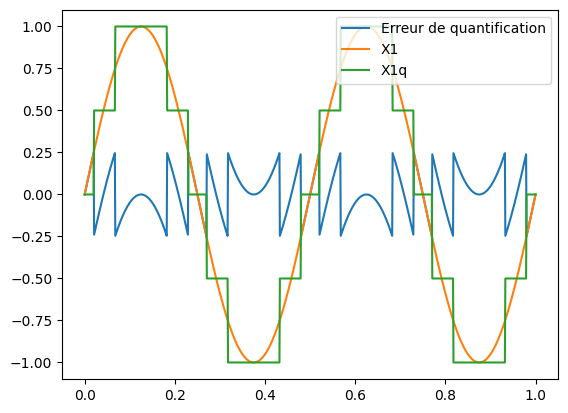

In [163]:
E = X1 - X1q

plt.plot(T, E, label="Erreur de quantification")
plt.plot(T, X1, label="X1")
plt.plot(T, X1q, label="X1q")
plt.legend()
plt.show()

On peut voir que l'erreur de quantification passe par des paliers distincts et oscille entre -0.25 et 0.25.  
Dans le cas de la quantification précédente, on a une erreur de quantification plutôt acceptable.

10. Tester différentes valeurs de pas de quantification allant de q=0.1 à q=1. Que constatez-vous 
concernant l’erreur de quantification ? Commenter. 

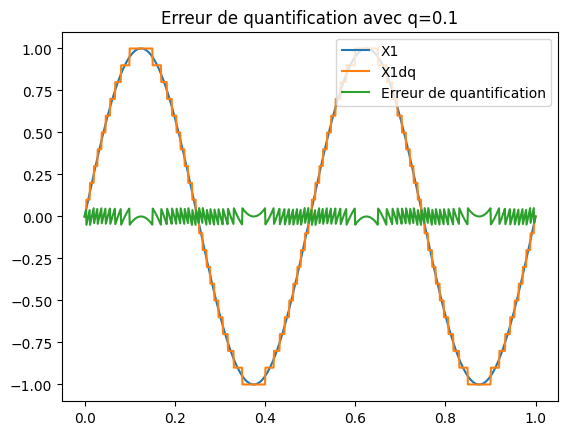

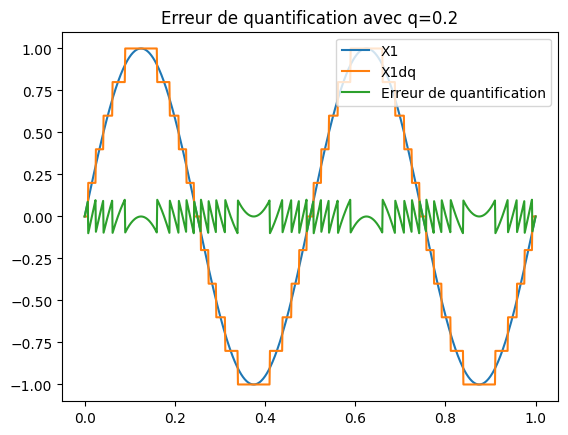

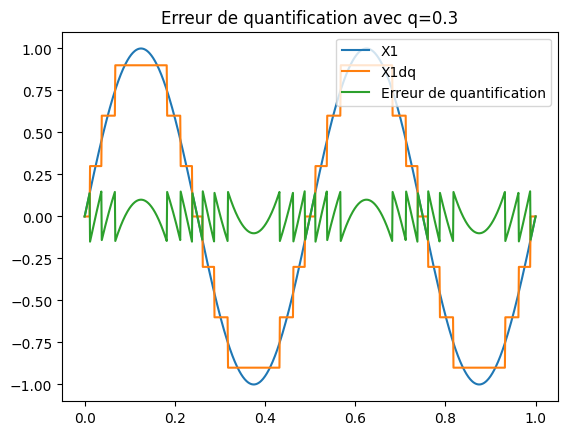

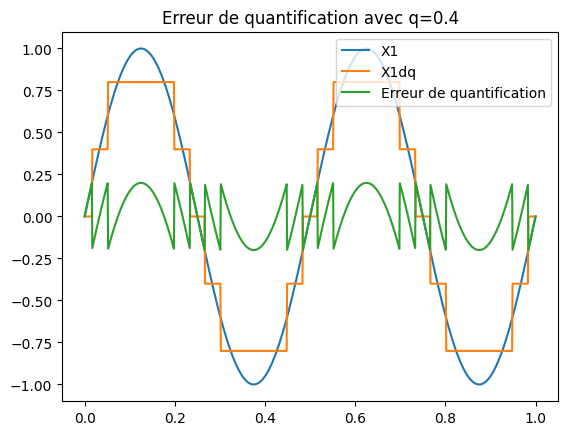

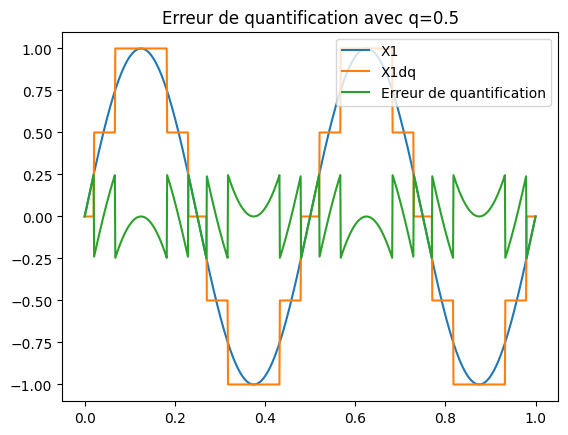

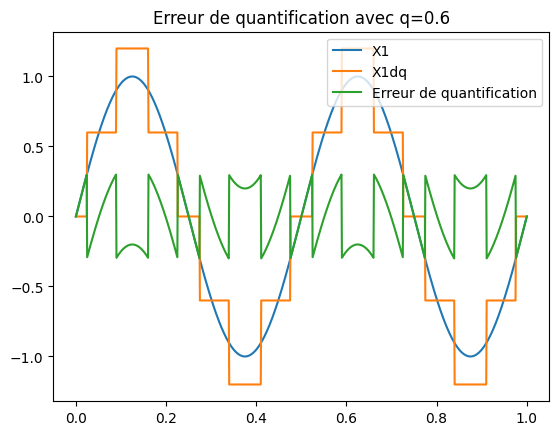

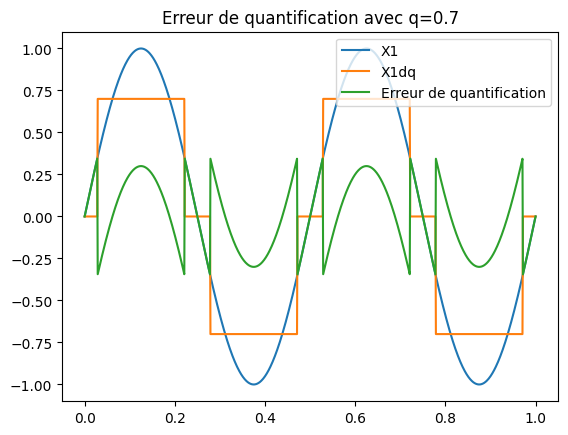

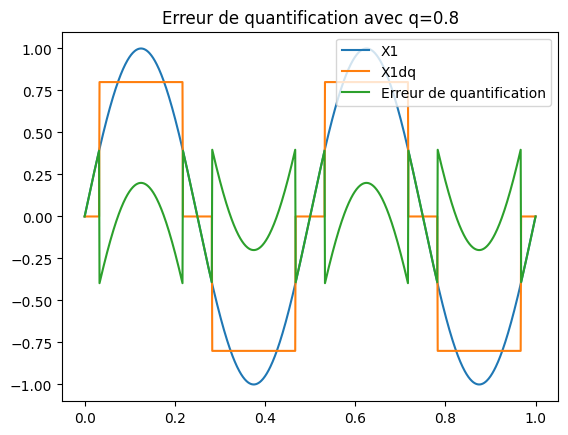

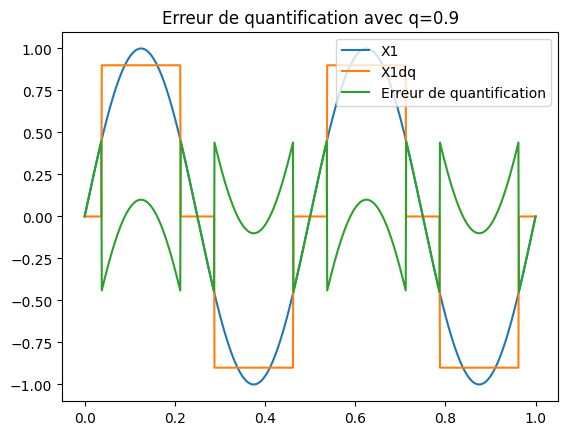

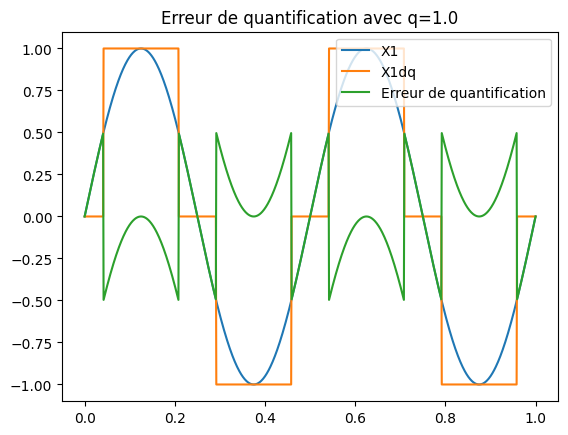

Plus le pas de quantification est grand, plus l'erreur de quantification est grande.


In [171]:
dq = [i/10 for i in range(1, 11, 1)]

for dqi in dq:
    X1dq = dqi*np.round(X1/dqi)
    Edq = X1 - X1dq

    plt.plot(T, X1, label="X1")
    plt.plot(T, X1dq, label="X1dq")
    plt.plot(T, Edq, label="Erreur de quantification")
    plt.title(f"Erreur de quantification avec q={dqi}")
    plt.legend()
    plt.show()

print("Plus le pas de quantification est grand, plus l'erreur de quantification est grande.")

11. Appliquer  l’opération  de  quantification  sur  divers  autres  signaux  (formes  et  fréquences 
différentes, signaux bruités, etc.). Commenter.

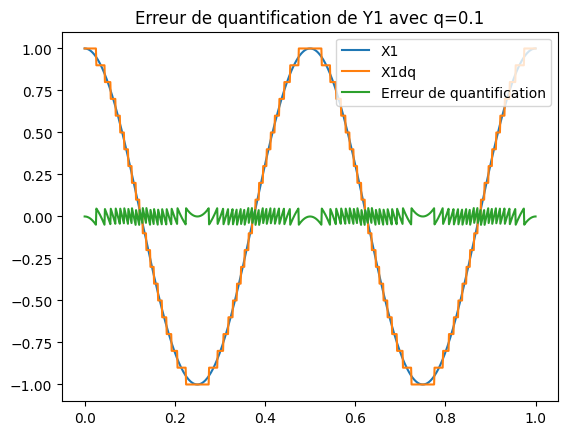

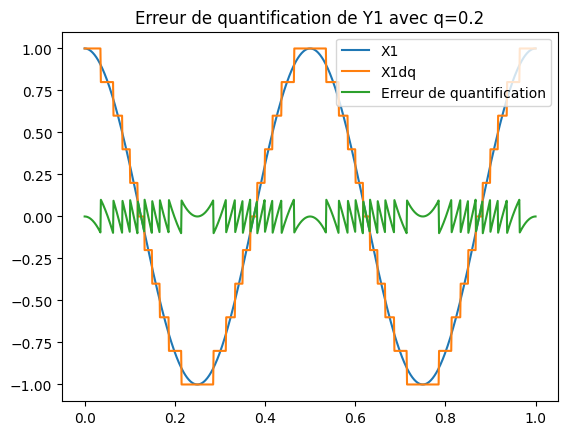

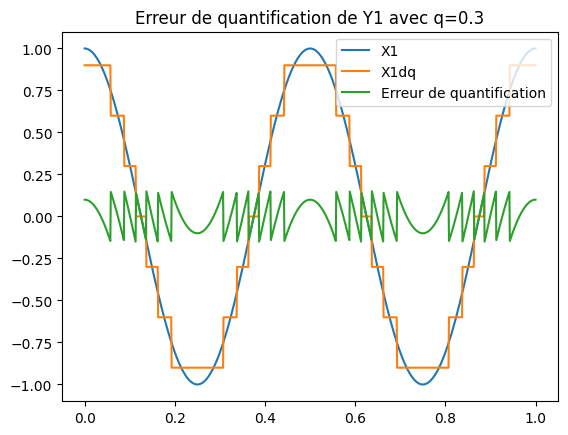

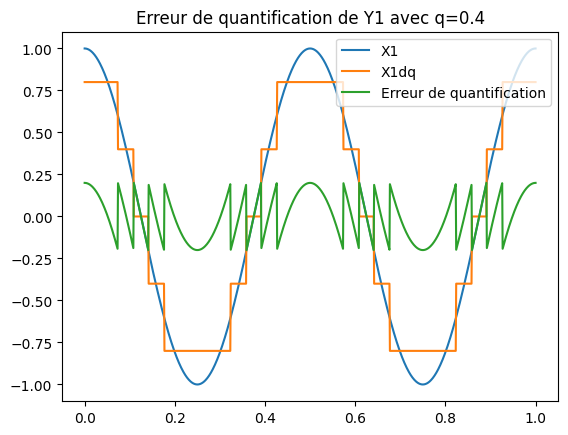

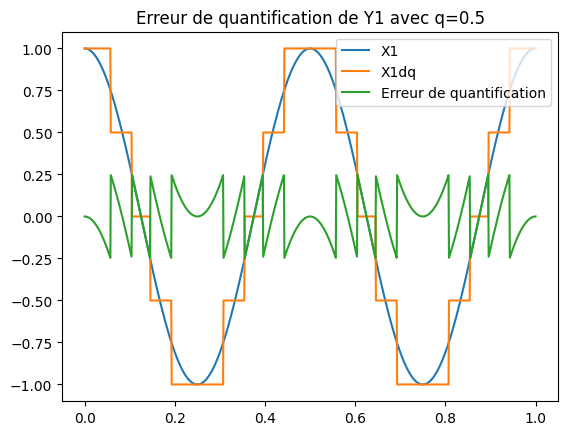

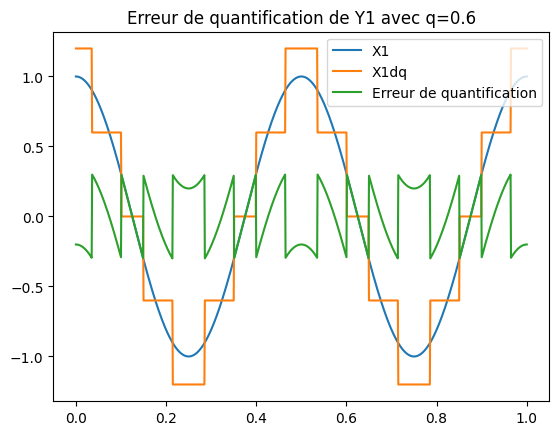

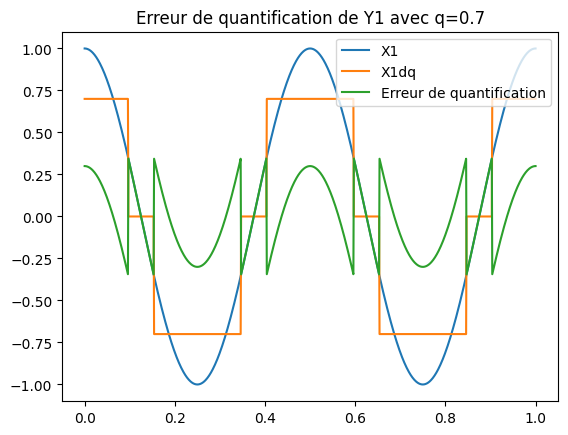

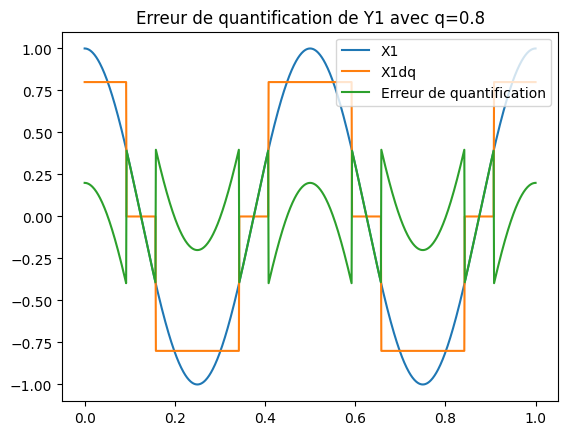

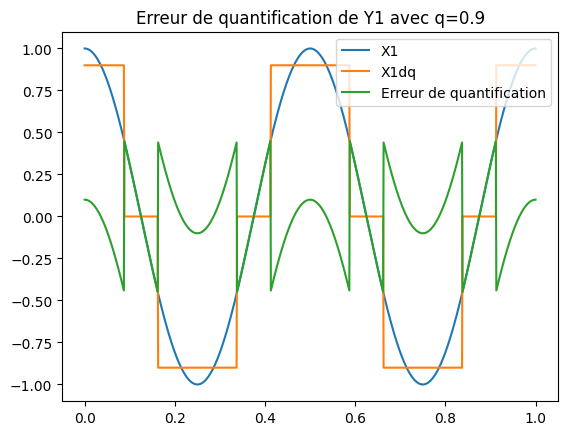

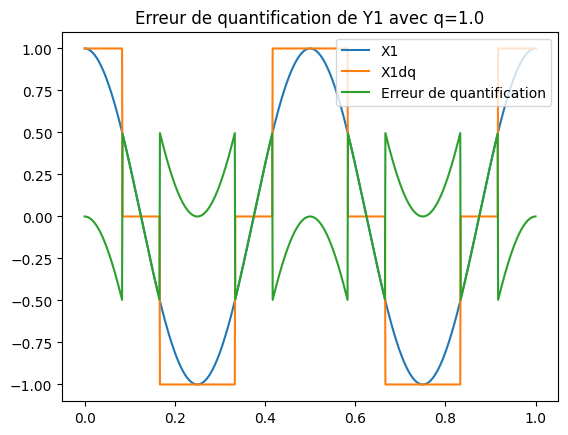

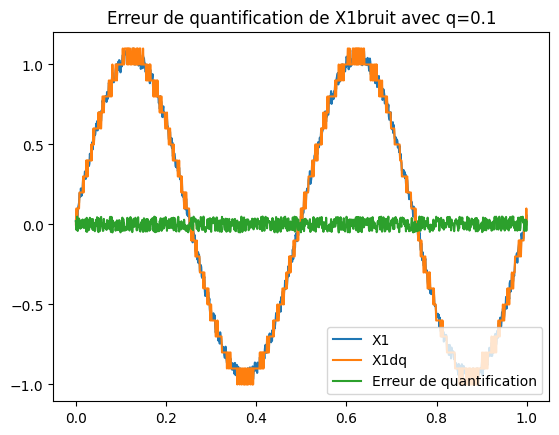

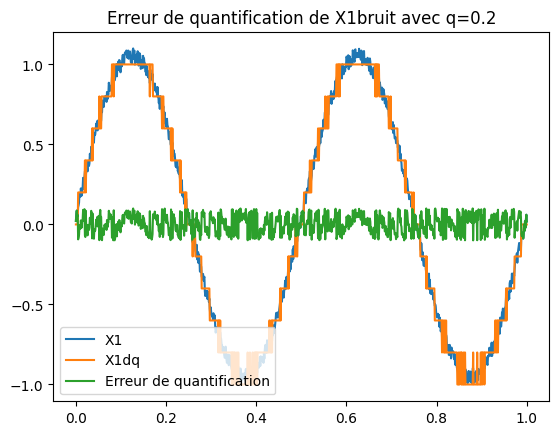

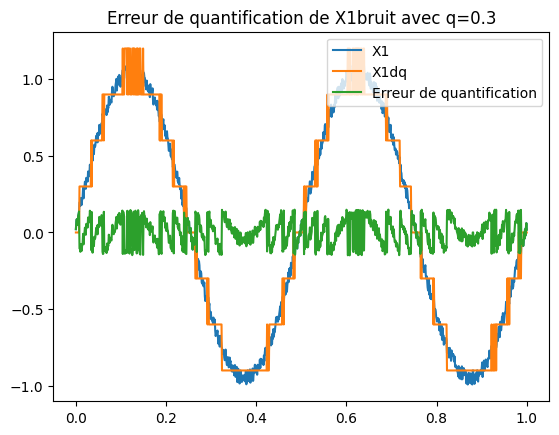

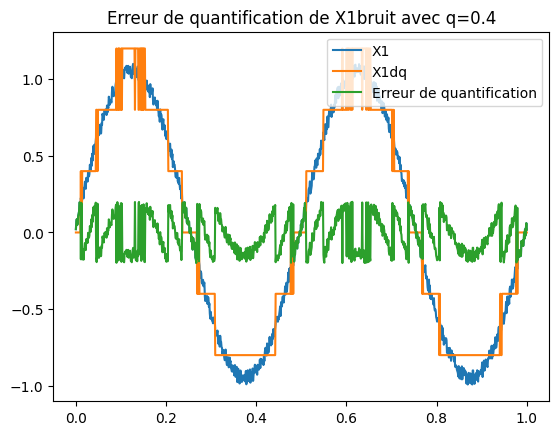

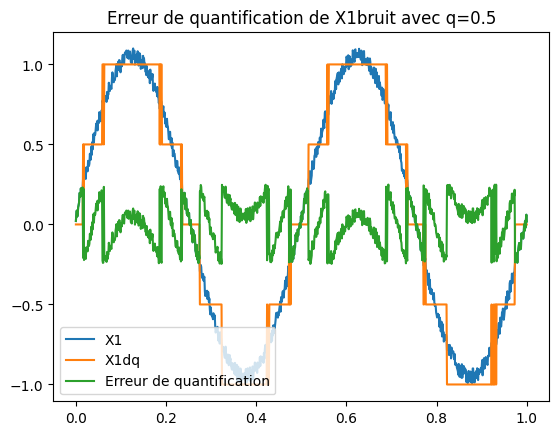

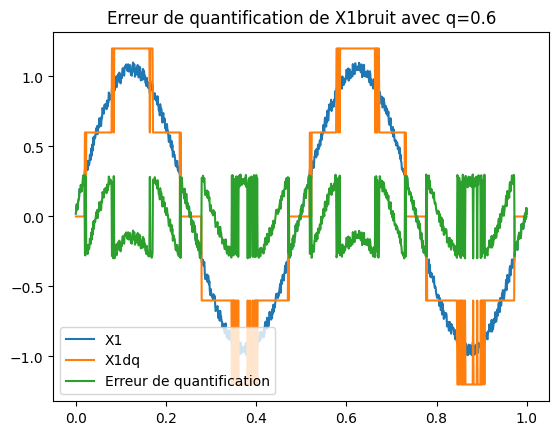

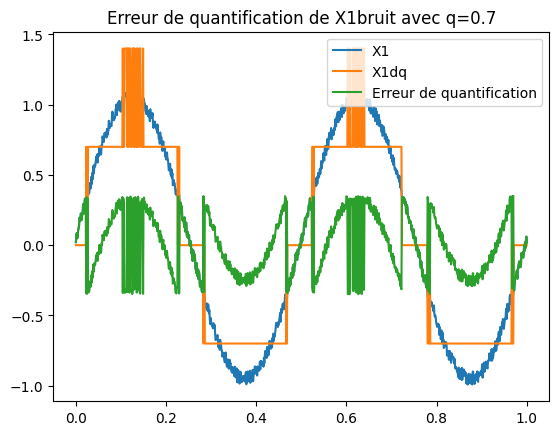

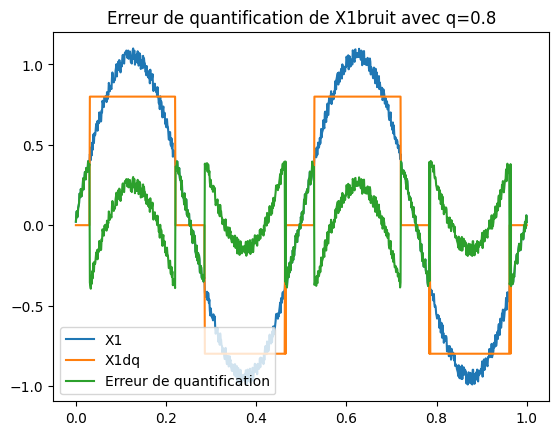

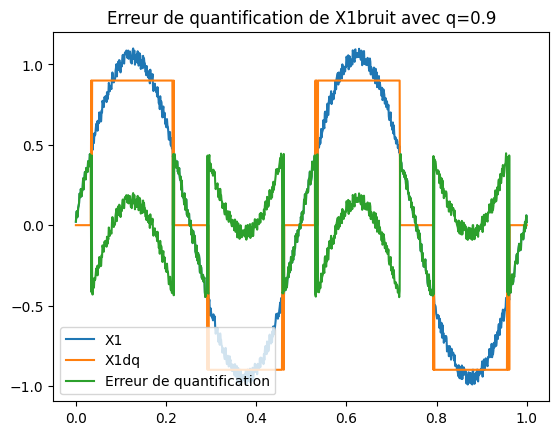

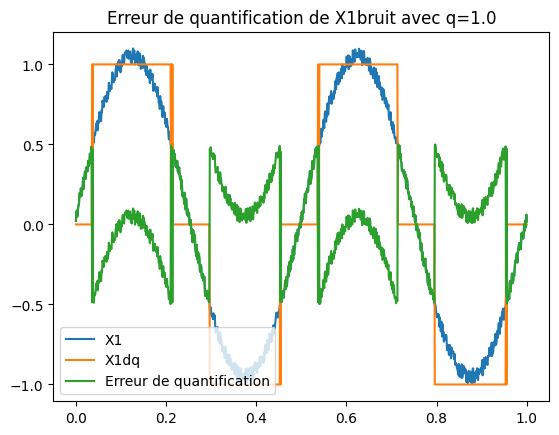

In [172]:
def testErreurQuantification(signal, signalName):
  ### On crée une liste contenant tous les pas de quantification
  ### A noter: On utilise des entiers puisque Range n'accepte pas
  ### de flottants en tant que pas. On crée alors une liste allant de
  ### 1 à 10 que l'on divise par 10 avant d'obtenir la valeur finale.
  ###
  ### Dq: Dynamic Quantification
  dq = [i/10 for i in range(1, 11, 1)]

  for dqi in dq:
    ### DqI: Dynamic Quantification Index
    ### SignalDq: Signal Dynamically Quantified
    ### EDq: Ecart Dynamic Quantification
    signalDq = dqi*np.round(signal/dqi)
    Edq = signal - signalDq

    plt.plot(T, signal, label="X1")
    plt.plot(T, signalDq, label="X1dq")
    plt.plot(T, Edq, label="Erreur de quantification")
    plt.title(f"Erreur de quantification de {signalName} avec q={dqi}")
    plt.legend()
    plt.show()

### On aplique la quantification sur une sinusoïdale (cosinus)
testErreurQuantification(Y1, "Y1")
### On applique la quantification sur un signal bruité (à 0.1)
testErreurQuantification(X1bruit, "X1bruit")

## 4 - Echantillonnage des signaux

L’échantillonnage consiste à relever l’intensité du signal à des instants réguliers séparés par une durée 
appelée « période d’échantillonnage » (voir TD). 

12. écrire un programme en python permettant de produire un signal échantillonné X1ech à partir du 
signal X1. On choisira une période d’échantillonnage Te=20 ms. Représenter le signal X1 et le signal 
X1ech sur un même graphique. Vérifier que les résultats obtenus sont similaires à ceux représentés 
sur la figure ci-dessous. 


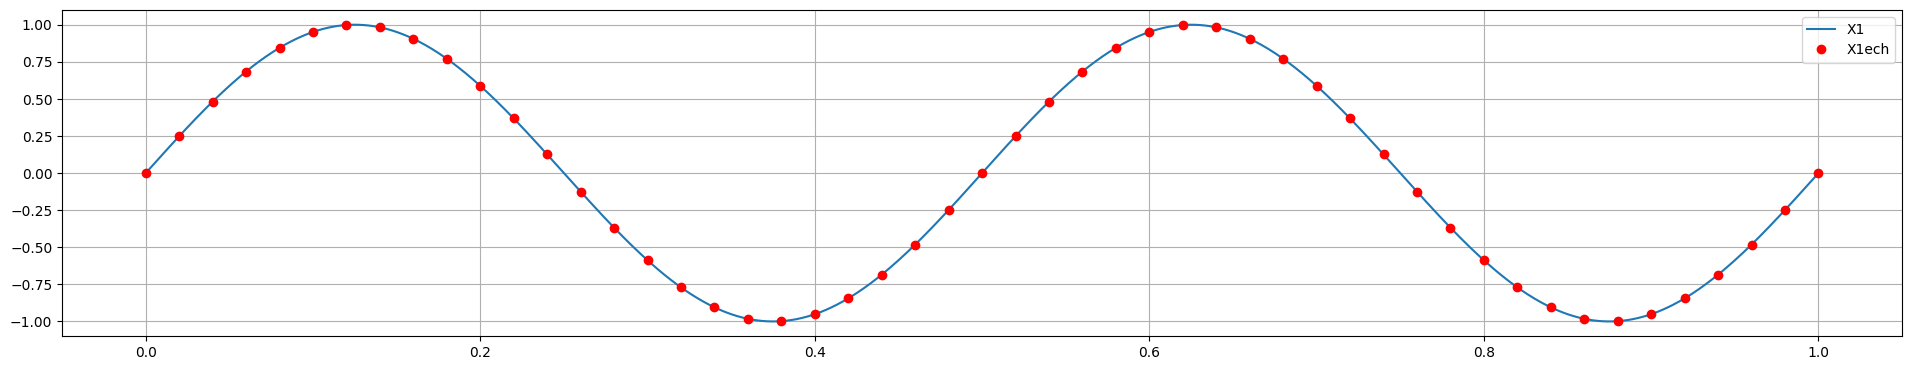

In [173]:
def createSamplingOfSignal(signal_to_sample, time_between_sample):
  time = []
  signal_sampled = []
  ### On force le passage en liste car sinon on ne peut pas pick
  ### les éléments comme on veut
  signal_to_sample_as_list = signal_to_sample.tolist()

  ### On va boucler dans les valeurs du signal à échantilloner
  ### On instaure un pas de la période d'échantillonnage (on compte déjà en ms)
  for i in range(0, len(signal_to_sample), time_between_sample):
    ### On remet le temps en ms (question d'indice à valeur indicative du temps de l'échantillon)
    time.append(i/1000)
    ### On ajoute notre échantillon
    signal_sampled.append(signal_to_sample_as_list[i])

  ### On retourne: le temps, notre signal échantillonné et la périodicité d'échantillonnage
  ### A noter: Si l'on voudrait suivre la convention du retour des fonctions de ce fichier
  ### Il faudrait inverser l'ordre entre le temps et le signal dans le retour
  return np.array(time), np.array(signal_sampled), time_between_sample

T1ech, X1ech, x = createSamplingOfSignal(X1, 20)

plt.grid()
plt.plot(T, X1, label="X1")
plt.plot(T1ech, X1ech, 'ro', label="X1ech")
plt.gcf().subplots_adjust(bottom=0.2, right=3)
plt.axis("tight")
plt.legend()
plt.show()

13. Afficher uniquement le signal échantillonné pour différentes périodes d’échantillonnage (10 ms, 
20 ms, 50 ms et 100 ms). Que constatez-vous ? Est-il possible de deviner mentalement le signal 
d’origine pour une période d’échantillonnage de 100 ms ?


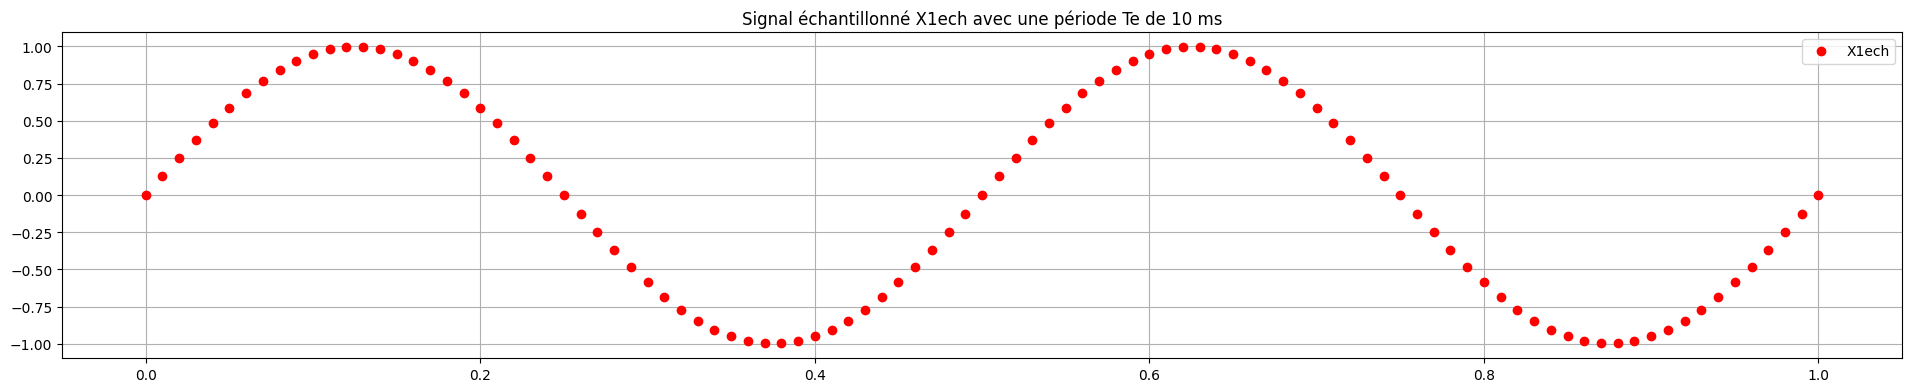

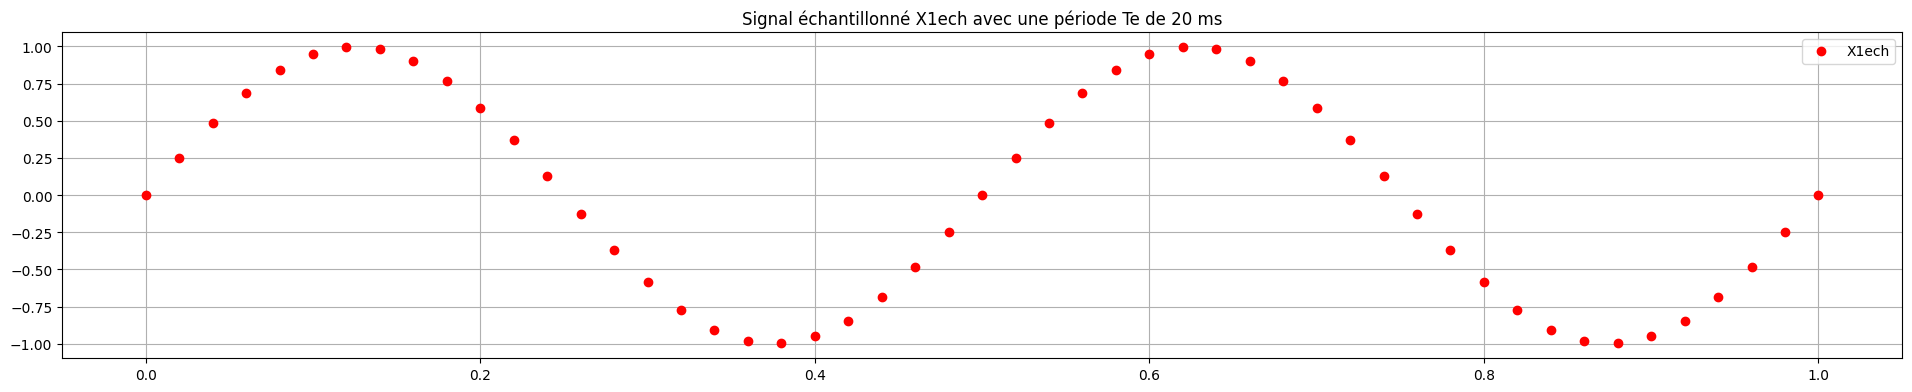

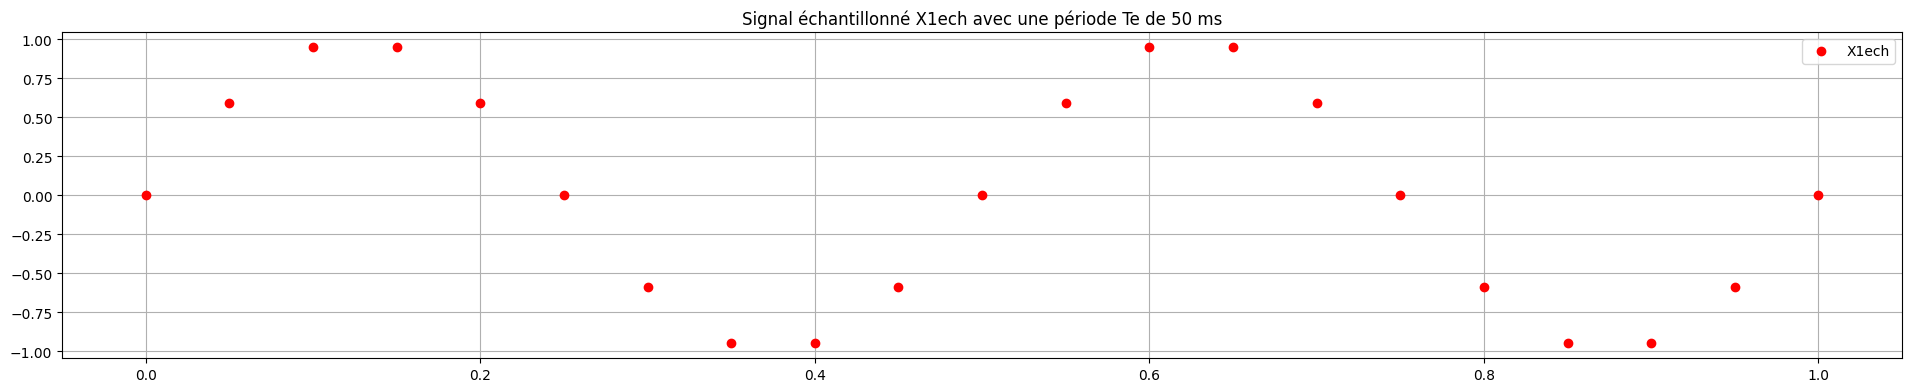

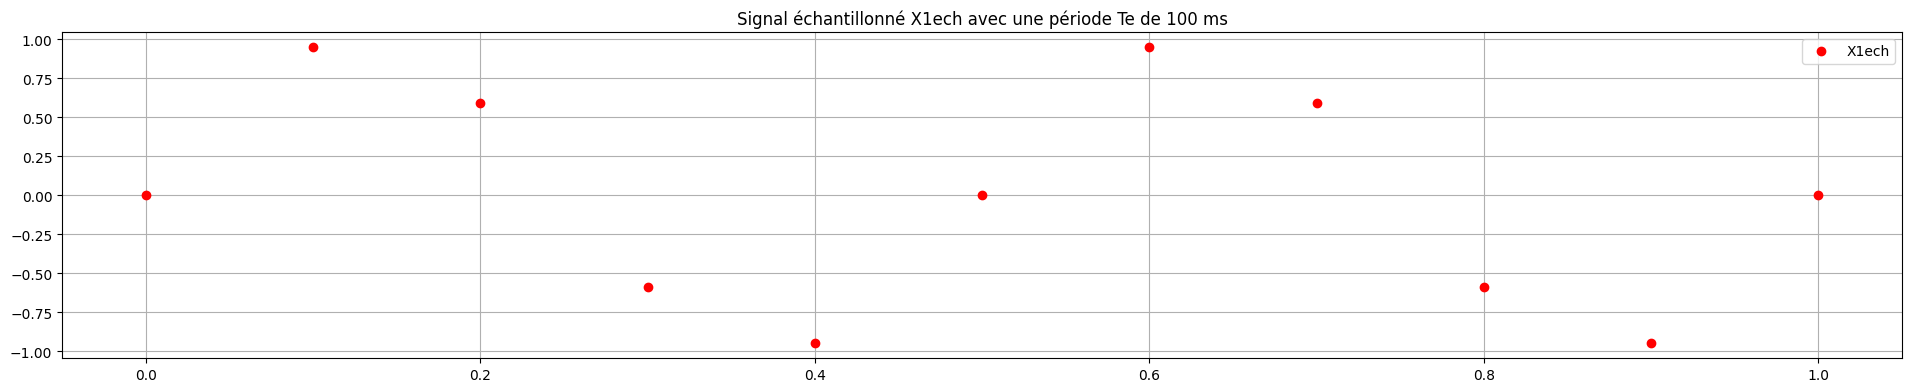

Plus la périodicité est élevée plus la forme du signal initial disparait
Avec une période d'échantillonnage de 100ms, il devient compliqué de deviner mentalement la forme du signal originel


In [174]:
def showSampledSignal(data, sampled_data, showOriginal=False):
  time, signal = data
  sampled_time, sampled_signal, time_to_sample = sampled_data

  plt.grid()
  if showOriginal:
    plt.plot(time, signal, label="X1")
  plt.plot(sampled_time, sampled_signal, "ro", label="X1ech")
  plt.axis("tight")
  plt.gcf().subplots_adjust(bottom=0.2, right=3)
  plt.title(f"Signal échantillonné X1ech avec une période Te de {time_to_sample} ms")
  plt.legend()
  plt.show()

showSampledSignal((T, X1), createSamplingOfSignal(X1, 10))
showSampledSignal((T, X1), createSamplingOfSignal(X1, 20))
showSampledSignal((T, X1), createSamplingOfSignal(X1, 50))
showSampledSignal((T, X1), createSamplingOfSignal(X1, 100))

## Réponse à la question
print("Plus la périodicité est élevée plus la forme du signal initial disparait")
print("Avec une période d'échantillonnage de 100ms, il devient compliqué de deviner mentalement la forme du signal originel")

14. D’après le théorème d’échantillonnage de Shannon, quelle est la limite maximale de la période 
d’échantillonnage nécessaire à la reconstruction du signal pour notre signal sinusoïdal X1 de fréquence 
2 Hz ?

Selon le théorème d'échantillonnage de Shannon, la fréquence d'échantillonnage doit être au moins deux fois plus élevée que la fréquence maximale du signal originel.

On peut traduire cette condition en Python comme:

```py
fe > 2*fmax
```

15. Représenter le signal échantillonné pour cette valeur maximale. Commenter.

In [175]:
def createSamplingOfSignalRespectingShannon(signal_to_sample, time_between_sample):
  time = []
  signal_sampled = []
  signal_to_sample_as_list = signal_to_sample.tolist()

  ### On prend 3 et pas 2 afin de nous permettre de respecter la condition
  ### du théorème de Shannon et de ne pas avoir à traiter avec un pas flottant.
  for i in range(0, len(signal_to_sample), time_between_sample//3):
    time.append(i/1000)
    signal_sampled.append(signal_to_sample_as_list[i])

  return np.array(time), np.array(signal_sampled), time_between_sample

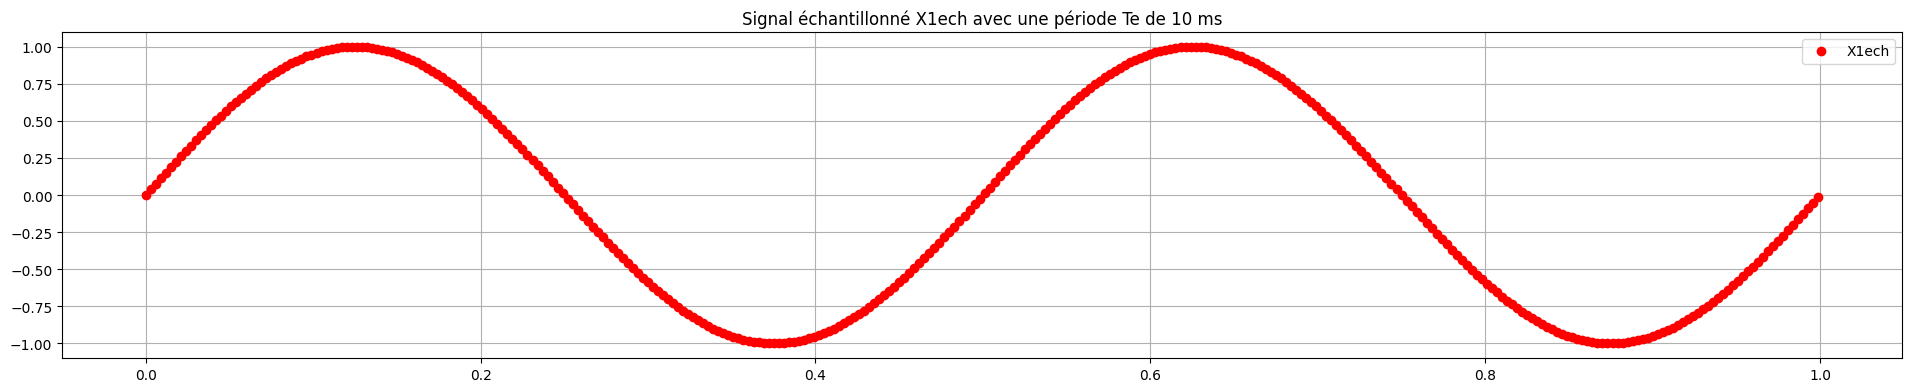

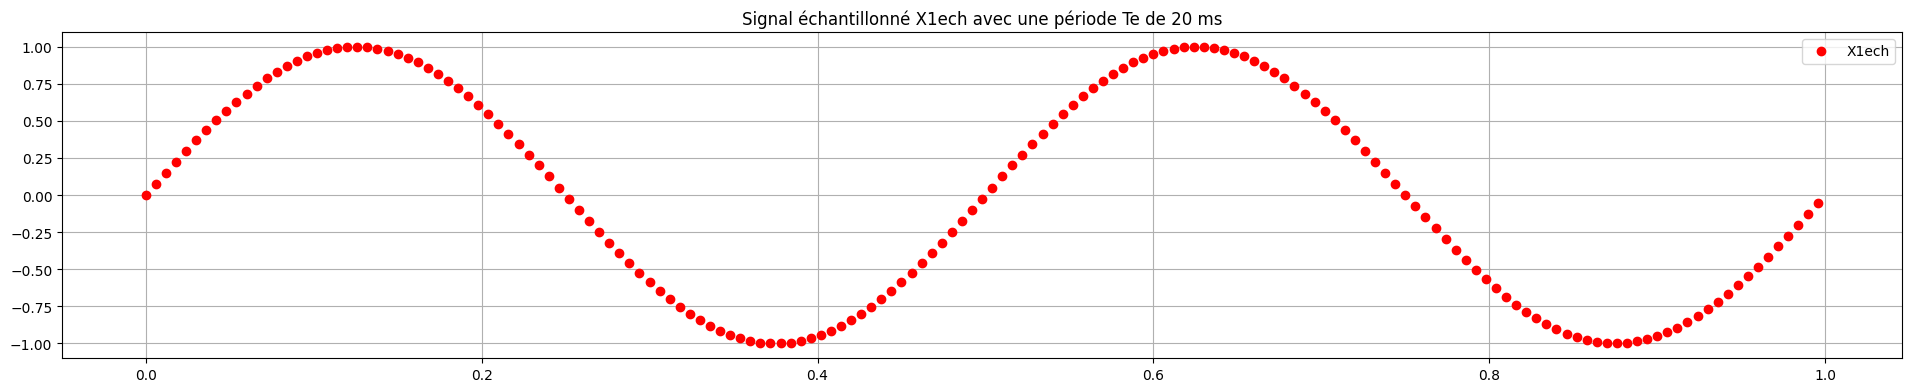

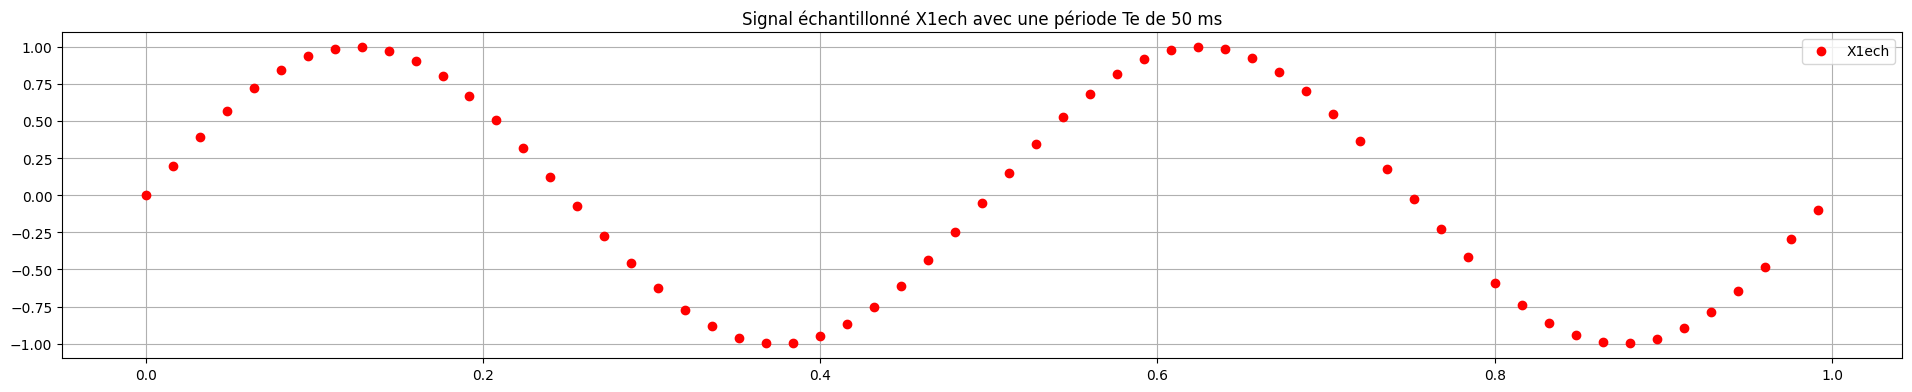

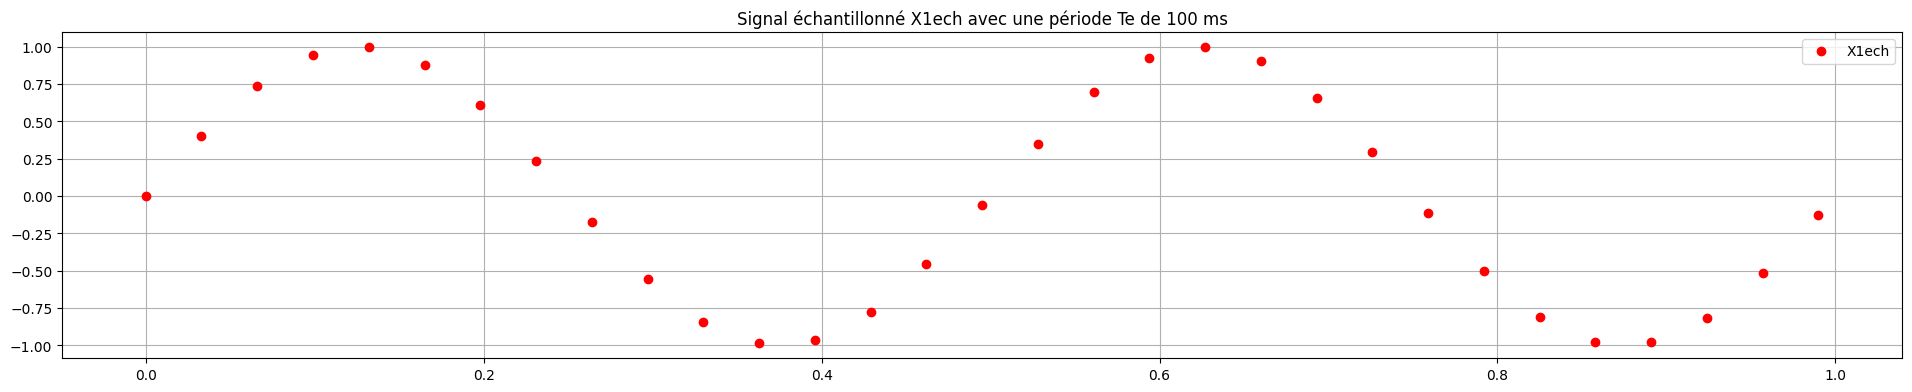

In [176]:
showSampledSignal((T, X1), createSamplingOfSignalRespectingShannon(X1, 10))
showSampledSignal((T, X1), createSamplingOfSignalRespectingShannon(X1, 20))
showSampledSignal((T, X1), createSamplingOfSignalRespectingShannon(X1, 50))
showSampledSignal((T, X1), createSamplingOfSignalRespectingShannon(X1, 100))

Quand on respecte le théorème de Shannon, même avec une périodicitée d'échantillonnage élevée (ici, 100 ms), on arrive à reconstruire le signal d'origine.

## Copyright &copy; 2023 Alexis Opolka - All Rights Reserved
